The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Iteration_number=0
L = 71288.7465308
number of components:46
Iteration_number=1
L = 71646.5078565
number of components:34
Iteration_number=2
L = 74525.4222342
number of components:36
Iteration_number=3
L = 78981.0839516
number of components:37
Iteration_number=4
L = 81976.6123094
number of components:37
Iteration_number=5
L = 83060.5962327
number of components:36
Iteration_number=6
L = 83390.1529567
number of components:36
Iteration_number=7
L = 83529.7220785
number of components:36
Iteration_number=8
L = 83593.0362435
number of components:36
Iteration_number=9
L = 83655.5874322
number of components:35
Iteration_number=10
L = 83708.4788399
number of components:35
Iteration_number=11
L = 83761.8188268
number of components:35
Iteration_number=12
L = 83795.2435023
number of components:35
Iteration_number=13
L = 83810.4440966
number of components:35
Iteration_number=14
L = 83819.0522876
number of compon

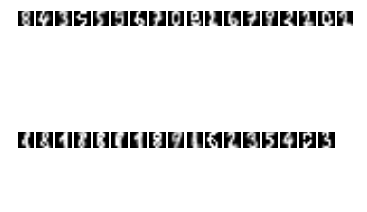

In [69]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from sklearn.datasets import load_digits
from DPMixture import *
digits = load_digits()
th = 8
X = digits.data > th
alpha = 1
a = 0.1
b = 0.1
N = X.shape[0]
clfr = DPMixture(X[:N/2, :], alpha, a, b)
l_list = clfr.var_inference(display=True)
clfr.show_clusters()

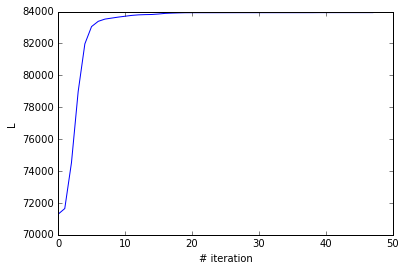

In [71]:
import matplotlib.pyplot as plt
plt.plot(l_list)
plt.xlabel('# iteration')
plt.ylabel('L')
plt.show()

(898L, 64L)
(899L, 64L)
(898L, 37L)
(899L, 37L)
Iteration_number=0
-12255.377536
Iteration_number=1
-7645.11502311
Iteration_number=2
-6556.71058029
Iteration_number=3
-6433.63922866
Iteration_number=4
-6365.86613031
Iteration_number=5
-6332.38886344
Iteration_number=6
-6307.22942858
Iteration_number=7
-6275.42991544
Iteration_number=8
-6238.2613859
Iteration_number=9
-6201.79751914
Iteration_number=10
-6170.34550102
Iteration_number=11
-6150.96862749
Iteration_number=12
-6133.25655456
Iteration_number=13
-6127.21213364
Iteration_number=14
-6121.09580457
Iteration_number=15
-6110.86059972
Iteration_number=16
-6102.43999153
Iteration_number=17
-6095.1594681
Iteration_number=18
-6083.92955609
Iteration_number=19
-6066.47251391
Iteration_number=20
-6037.04362682
Iteration_number=21
-6007.21686996
Iteration_number=22
-5974.2621782
Iteration_number=23
-5949.88293483
Iteration_number=24
-5932.82549972
Iteration_number=25
-5925.98246711
Iteration_number=26
-5921.72558642
Iteration_number=27
-

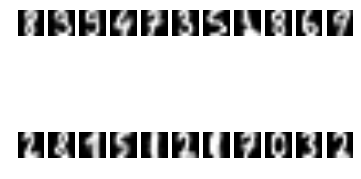

In [196]:
clfr.add_samples(X[N/2:, :])
clfr.var_inference(display=True)
clfr.show_clusters()

alpha=0.01 a=0.1 b=0.1
31


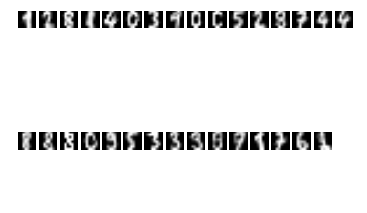

alpha=0.1 a=0.1 b=0.1
30


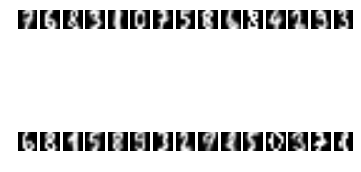

alpha=1 a=0.1 b=0.1
32


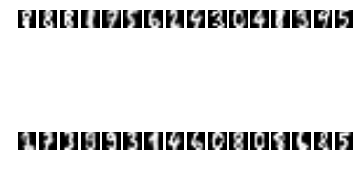

alpha=100 a=0.1 b=0.1
33


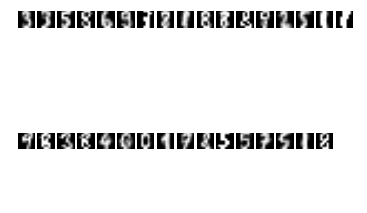

In [210]:
alpha_list = [0.01, 0.1, 1, 100]
a_list = [0.1]
b_list = [0.1]
for alph in alpha_list:
    for a in a_list:
        for b in b_list:
            clfr = DPMixture(X[:N/2, :], alpha, a, b)
            print('alpha=' + str(alph) + ' a=' + str(a) + ' b=' + str(b))
            clfr.var_inference(display=False)
            clfr.show_clusters()


alpha=1 a=0.1 b=0.1
28


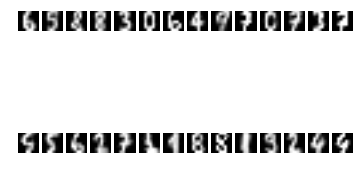

alpha=1 a=1 b=0.1
17


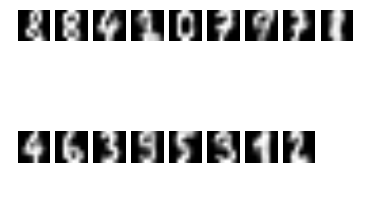

alpha=1 a=5 b=0.1
3


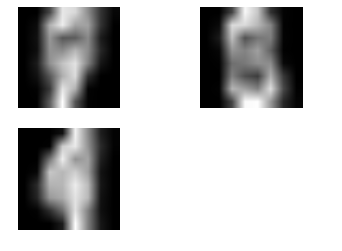

In [214]:
alpha_list = [1]
a_list = [0.1, 1, 5]
b_list = [0.1]
for alph in alpha_list:
    for a in a_list:
        for b in b_list:
            clfr = DPMixture(X[:N/2, :], alpha, a, b)
            print('alpha=' + str(alph) + ' a=' + str(a) + ' b=' + str(b))
            clfr.var_inference(display=False)
            clfr.show_clusters()

alpha=1 a=0.1 b=0.1
35


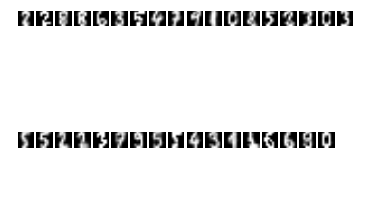

alpha=1 a=0.1 b=1
23


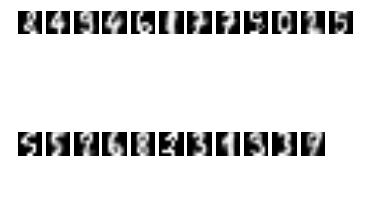

alpha=1 a=0.1 b=5
14


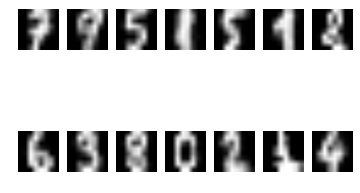

In [215]:
alpha_list = [1]
b_list = [0.1, 1, 5]
a_list = [0.1]
for alph in alpha_list:
    for a in a_list:
        for b in b_list:
            clfr = DPMixture(X[:N/2, :], alpha, a, b)
            print('alpha=' + str(alph) + ' a=' + str(a) + ' b=' + str(b))
            clfr.var_inference(display=False)
            clfr.show_clusters()

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
y = digits.target
gb_clfr = GradientBoostingClassifier()
sclr = StandardScaler();
lr_clfr = LogisticRegression()
tX = sclr.fit_transform(digits.data)
X_train, X_test, y_train, y_test = train_test_split(tX, y, random_state=42)


In [20]:
params_gb = {'learning_rate':[0.01, 0.1, 1], 'n_estimators':[50, 100, 200]}
gs_gb = GridSearchCV(gb_clfr, params_gb)
gs_gb.fit(X_train, y_train)
print(gs_gb.best_params_)
print(gs_gb.best_score_)

{'n_estimators': 200, 'learning_rate': 0.1}
0.953971789161


In [19]:
params_lr = {'penalty':['l1', 'l2'], 'C':[0.01, 0.1, 1, 10]}
gs_lr = GridSearchCV(lr_clfr, params_lr)
gs_lr.fit(X_train, y_train)
print(gs_lr.best_params_)
print(gs_lr.best_score_)

{'penalty': 'l1', 'C': 1}
0.96288047513


In [23]:
def accuracy(y1, y2):
    return sum(y1==y2)/float(len(y1))

In [24]:
best_lr = LogisticRegression(C=1, penalty='l1')
best_lr.fit(X_train, y_train)
preds = best_lr.predict(X_test)
accuracy(preds, y_test)

0.94888888888888889

In [26]:
best_gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1)
best_gb.fit(X_train, y_train)
preds = best_gb.predict(X_test)
accuracy(preds, y_test)

0.96444444444444444

In [29]:
clstr = DPMixture(X=X,  alpha=1, a=0.1, b=0.1)
clstr.var_inference()
new_X = clstr.gamma
new_train, new_test, y_train, y_test = train_test_split(new_X, y, random_state=42)

Iteration_number=0
57257.170213
Iteration_number=1
57512.4636833
Iteration_number=2
60251.7921515
Iteration_number=3
67068.4505196
Iteration_number=4
72257.5399775
Iteration_number=5
75200.717076
Iteration_number=6
76440.1933342
Iteration_number=7
76861.8564345
Iteration_number=8
77066.5510154
Iteration_number=9
77199.5880089
Iteration_number=10
77267.4596788
Iteration_number=11
77310.3930316
Iteration_number=12
77353.0439843
Iteration_number=13
77382.40685
Iteration_number=14
77394.6579898
Iteration_number=15
77403.8097813
Iteration_number=16
77415.7226082
Iteration_number=17
77423.1361811
Iteration_number=18
77429.4585614
Iteration_number=19
77434.3340937
Iteration_number=20
77436.8138683
Iteration_number=21
77439.3505263
Iteration_number=22
77443.3700693
Iteration_number=23
77450.5474363
Iteration_number=24
77461.6591191
Iteration_number=25
77473.4491213
Iteration_number=26
77475.2959051
Iteration_number=27
77476.658496
Iteration_number=28
77478.4487028
Iteration_number=29
77487.621

54


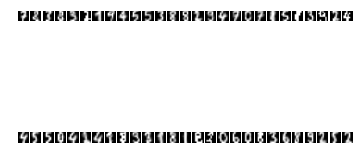

In [43]:
clstr.show_clusters()

In [30]:
params_gb = {'learning_rate':[0.01, 0.1, 1], 'n_estimators':[50, 100, 200]}
gs_gb = GridSearchCV(gb_clfr, params_gb)
gs_gb.fit(new_train, y_train)
print(gs_gb.best_params_)
print(gs_gb.best_score_)

{'n_estimators': 100, 'learning_rate': 0.1}
0.877505567929


In [31]:
params_lr = {'penalty':['l1', 'l2'], 'C':[0.01, 0.1, 1, 10]}
gs_lr = GridSearchCV(lr_clfr, params_lr)
gs_lr.fit(new_train, y_train)
print(gs_lr.best_params_)
print(gs_lr.best_score_)

{'penalty': 'l1', 'C': 10}
0.867854491463


In [35]:
best_lr = LogisticRegression(C=10, penalty='l1')
best_lr.fit(new_train, y_train)
preds_lr = best_lr.predict(new_test)
accuracy(preds_lr, y_test)

0.88

In [36]:
best_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
best_gb.fit(new_train, y_train)
preds_gb = best_gb.predict(new_test)
accuracy(preds_gb, y_test)

0.89333333333333331

In [41]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[40  0  0  0  0  1  1  0  0  1]
 [ 0 32  1  0  1  0  0  0  3  0]
 [ 0  3 33  0  0  0  0  0  2  0]
 [ 0  0  0 37  0  2  0  1  3  3]
 [ 0  0  0  0 54  1  0  0  0  0]
 [ 0  0  0  0  0 55  1  1  0  2]
 [ 1  0  0  0  0  0 43  0  1  0]
 [ 0  1  0  0  0  0  0 40  0  0]
 [ 0  1  4  0  0  1  0  2 28  2]
 [ 0  1  0  2  0  3  0  2  0 40]]


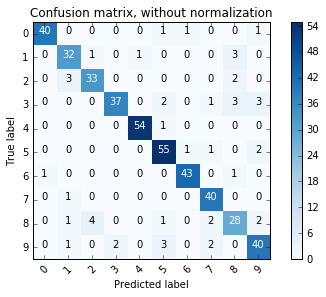

In [42]:
cnf_matrix = confusion_matrix(y_test, preds_gb)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      title='Confusion matrix, without normalization')

26


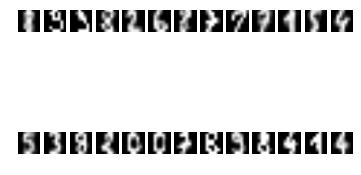

In [60]:
n_iter = 4

clstr = DPMixture(X=X[:N/n_iter, :],  alpha=1, a=0.1, b=0.1)
clstr.var_inference(display=False)
clstr.show_clusters()

23


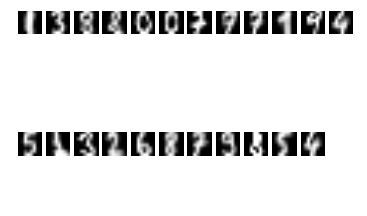

23


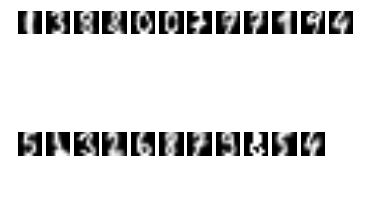

22


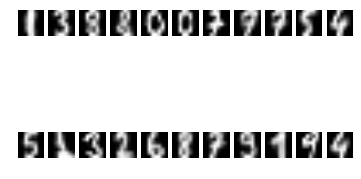

In [62]:
for i in range(1, n_iter):
    clstr = clstr.add_samples(X[N/n_iter * i : N/n_iter * (i + 1) , :])
    clstr.var_inference(display=False)
    clstr.show_clusters()

In [77]:
multystart_test = DPMixture(X=X,  alpha=1, a=0.1, b=0.1)
multystart_test.var_inference(num_start=5)

Iteration_number=0
L = 57257.5022168
number of components:58
Iteration_number=1
L = 57515.4970779
number of components:48
Iteration_number=2
L = 60382.4801169
number of components:49
Iteration_number=3
L = 67083.4370252
number of components:55
Iteration_number=4
L = 72122.1142922
number of components:56
Iteration_number=5
L = 75076.5416905
number of components:54
Iteration_number=6
L = 76429.6171512
number of components:54
Iteration_number=7
L = 76874.7279408
number of components:54
Iteration_number=8
L = 77037.7137734
number of components:54
Iteration_number=9
L = 77121.2786389
number of components:53
Iteration_number=10
L = 77178.8669539
number of components:53
Iteration_number=11
L = 77237.7801731
number of components:53
Iteration_number=12
L = 77286.7348843
number of components:53
Iteration_number=13
L = 77309.2626437
number of components:53
Iteration_number=14
L = 77327.5118652
number of components:53
Iteration_number=15
L = 77357.0050993
number of components:53
Iteration_number=1

[57256.535585149832,
 57505.705027545671,
 60333.660548821324,
 66676.380027478925,
 71791.148068625873,
 75133.548719093757,
 76344.545281217914,
 76985.885238603092,
 77230.166451198122,
 77304.598898207289,
 77343.717742180335,
 77376.242406791367,
 77400.14885577235,
 77422.666539709666,
 77448.56684338089,
 77458.070592936259,
 77464.111731240191,
 77467.553202854935,
 77470.546320142457,
 77473.105610635655,
 77474.480251437853,
 77475.953859151443,
 77478.678960920864,
 77483.6158541029,
 77484.849317884218,
 77485.445646002001,
 77485.611737441403,
 77485.756088918235,
 77485.903520340973,
 77486.071608560465,
 77486.291512621552,
 77486.641316028064,
 77487.628176270809,
 77491.413309002673,
 77492.66608386382,
 77492.794498373172,
 77492.868812175308,
 77492.919343662172,
 77492.958210045123,
 77493.005434361883,
 77493.305767738726,
 77495.97320567345,
 77497.063993598989,
 77497.106350981689,
 77497.365640584874,
 77500.77839862871,
 77507.539245136169,
 77507.57333141056,


31


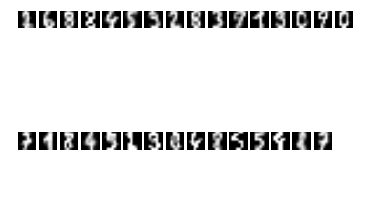

In [72]:
n_iter = 4

clstr = DPMixture(X=X[:N/n_iter, :],  alpha=1, a=0.1, b=0.1)
clstr.var_inference(display=False)
clstr.show_clusters()

27


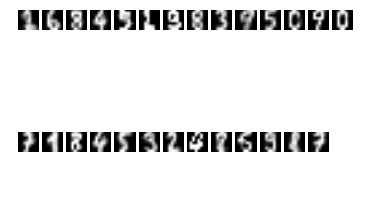

26


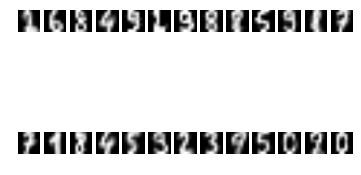

26


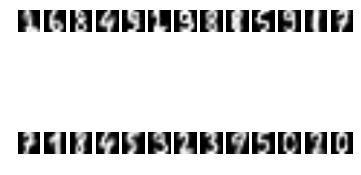

In [73]:
for i in range(1, n_iter):
    clstr = clstr.add_samples(X[N/n_iter * i : N/n_iter * (i + 1) , :])
    clstr.var_inference(display=False)
    clstr.show_clusters()